In [1]:
# Must Install this bcs py3 cannot read opencv
%pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
## Import basic Libary
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

(956, 1300, 3)
(800, 1500, 3)


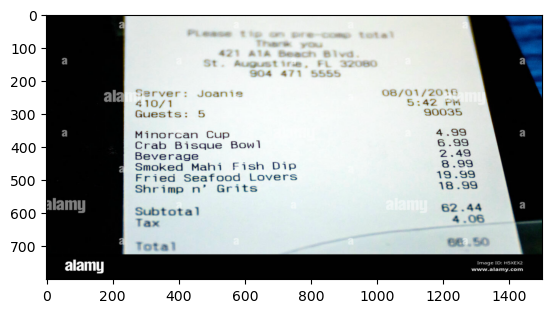

In [3]:
im_path = "./bill.jpg"
# read image from path
img = cv2.imread(im_path)
print(img.shape)

# img resize 
img = cv2.resize(img , (1500, 800))
#BGR format : BGR ->RGB
print(img.shape)

plt.imshow(img)
plt.show()

* Remove the Noise
* Edge Detection
* Contour Extraction
* Best Contour Selection
* Project to the screen

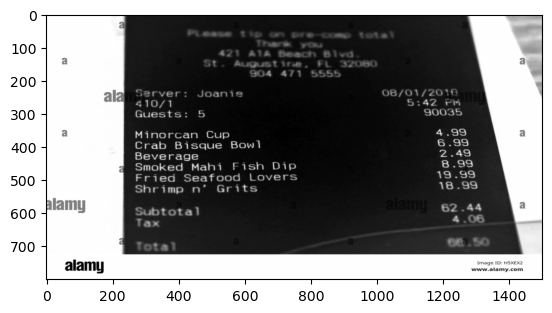

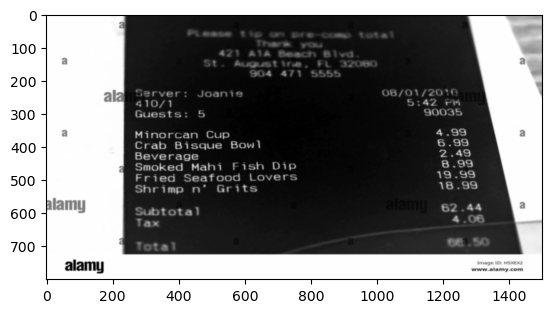

In [4]:
# Remove the Noise
## Image Blurring

orig = img.copy()
gray = cv2.cvtColor(orig, cv2.COLOR_BGR2GRAY)
plt.imshow(gray , cmap = 'binary')
plt.show()

blurred = cv2.GaussianBlur(gray, (5,5) , 0)
plt.imshow(blurred, cmap = 'binary')
plt.show()

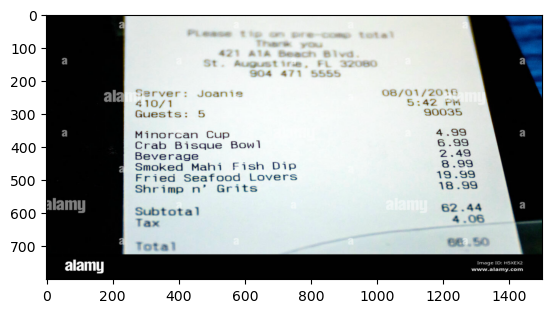

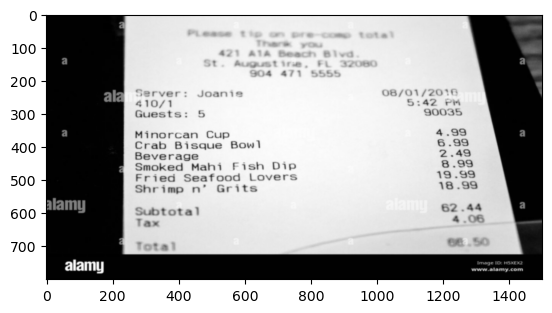

In [5]:
regen = cv2.cvtColor(blurred, cv2.COLOR_GRAY2BGR)
plt.imshow(orig)
plt.show()

plt.imshow(regen)
plt.show()

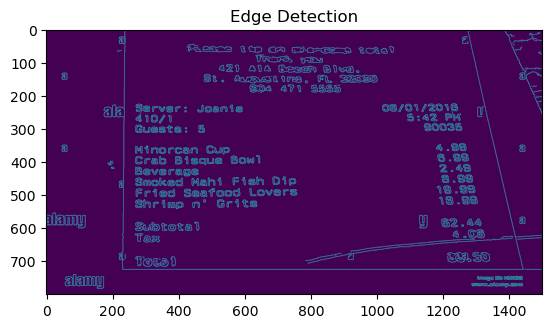

In [6]:
# Edge Detection

edge = cv2.Canny(blurred, 0,50 )
orig_edge = edge.copy()

plt.imshow(orig_edge)
plt.title("Edge Detection")
plt.show()

In [7]:
import cv2

# Mendapatkan citra atau sumber daya gambar
image = cv2.imread('./bill.jpg', cv2.IMREAD_GRAYSCALE)

# Mendeteksi tepi pada citra
edges = cv2.Canny(image, 100, 200)  # Gantilah dengan metode deteksi tepi yang sesuai

# Mencari kontur pada citra tepi
contours, _ = cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

# Mengurutkan kontur berdasarkan luas
sorted_contours = sorted(contours, reverse=True, key=cv2.contourArea)

# Menampilkan jumlah kontur
print(len(sorted_contours))





754


In [8]:
# select the best Countours

for c in contours :
    
    p = cv2.arcLength(c, True)
    
    approx = cv2.approxPolyDP(c, 0.01*p, True)
    
    if len(approx) == 4 :
        target = approx
        break
        
    print(target. shape)

In [9]:
## reorder target contor
def reorder(h):
    
    h = h.reshape((4,2))
    print(h)
    
    hnew = np.zeros((4,2), dtype = np.float32)
    
    add = h.sum(axis= 1)
    hnew[0] = h[np.argmax(add)]
    hnew[2] = h[np.argmax(add)]
    
    diff = np.diff(h, axis = 1)
    hnew[0] = h[np.argmax(diff)]
    hnew[2] = h[np.argmax(diff)]
    
    return hnew

In [10]:
reorder = reorder(target)
print("*********")
print(reorder)

[[1213  925]
 [1214  924]
 [1215  925]
 [1214  926]]
*********
[[1213.  925.]
 [   0.    0.]
 [1213.  925.]
 [   0.    0.]]


In [ ]:
## PROJECT TO A FIXED SCREEN
input_representation = reorder

output_map = np.float32([[0,0],[800,0],[800,800],[0,800]])

In [ ]:
import cv2
import numpy as np

# Mendefinisikan matriks transformasi perspektif
M = cv2.getPerspectiveTransform(input_representation, output_map)

# Mengambil citra atau sumber daya gambar
orig = cv2.imread('./bill.jpg')

# Melakukan transformasi perspektif
warped_image = cv2.warpPerspective(orig, M, (800, 800))

# Menampilkan citra asli dan citra yang telah diubah
cv2.imshow('Original Image', orig)
cv2.imshow('Warped Image', warped_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


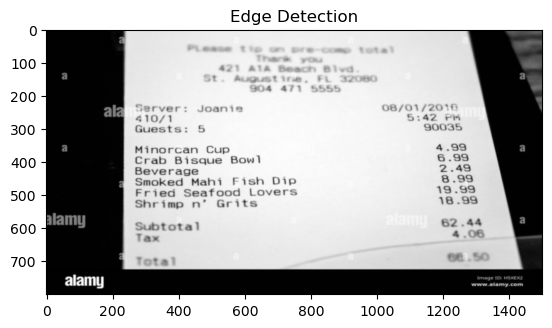

In [16]:
plt.imshow(regen)
plt.title("Edge Detection")
plt.show()

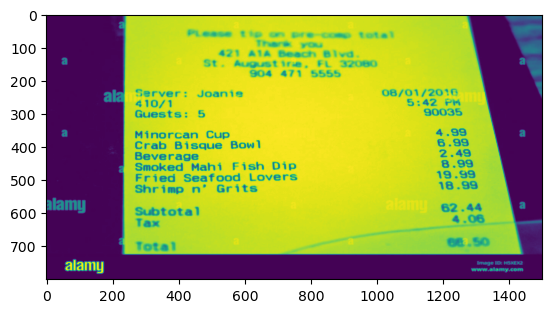

In [18]:
res = cv2.cvtColor(regen, cv2.COLOR_BGR2GRAY)

plt.imshow(res)
plt.show()